In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
Data_all = pd.read_csv('Amreli NRM data for model building.csv')

In [11]:
Data_all

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),...,Previous Frequency,Previous Rating of the Furnace,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating
0,1,1.0,130.0,0.0,39.467073,0,0.280,39.747073,0.201,1693.0,...,0.0,0.0,3728.0,273.0,3728.0,15.066000,0.001258,0.0,6.750000,6.687037
1,1,2.0,135.0,11.0,23.531707,0,0.390,34.921707,0.204,1685.0,...,273.0,3728.0,3740.0,274.0,3740.0,13.540444,0.001500,0.0,6.687037,6.624074
2,1,3.0,125.0,12.0,19.678049,0,0.394,32.072049,0.203,1633.0,...,274.0,3740.0,3731.0,275.0,3731.0,13.579200,0.001582,0.0,6.624074,6.561111
3,1,4.0,110.0,12.0,16.956098,0,0.450,29.406098,0.192,1686.0,...,275.0,3731.0,3764.0,270.0,3764.0,14.244000,0.001628,0.0,6.561111,6.498148
4,1,5.0,115.0,13.0,17.032927,0,0.495,30.527927,0.196,1689.0,...,270.0,3764.0,3756.0,274.0,3756.0,14.192348,0.001568,0.0,6.498148,6.435185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,9,59.0,130.0,0.0,34.835366,0,0.635,35.470366,0.249,1679.0,...,314.0,3403.0,3366.0,362.0,3366.0,13.476923,0.001602,8.0,4.141535,4.096561
445,9,60.0,110.0,0.0,31.128049,0,0.585,31.713049,0.236,1652.0,...,362.0,3366.0,3498.0,328.0,3498.0,14.241818,0.001685,6.0,4.096561,4.051588
446,9,61.0,105.0,0.0,30.079268,0,0.365,30.444268,0.212,1650.0,...,328.0,3498.0,3428.0,351.0,3428.0,14.302857,0.001637,8.0,4.051588,4.006614
447,9,62.0,145.0,0.0,37.487805,0,0.710,38.197805,0.226,1701.0,...,351.0,3428.0,3210.0,368.0,3210.0,13.013793,0.001575,8.0,4.006614,3.961641


In [12]:
Data_all.columns

Index(['campaign', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Previous Voltage', 'Previous Frequency',
       'Previous Rating of the Furnace', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating'],
      dtype='object')

In [13]:
columns = ['campaign','Heat number (life number)','Previous Voltage','Previous Frequency','Refractory lining before heating','Number of capacitors removed','Voltage']
Data = Data_all[columns]
Data = Data[Data['Heat number (life number)']>1]


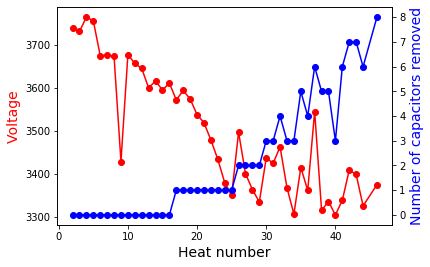

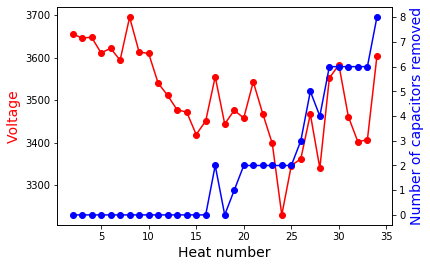

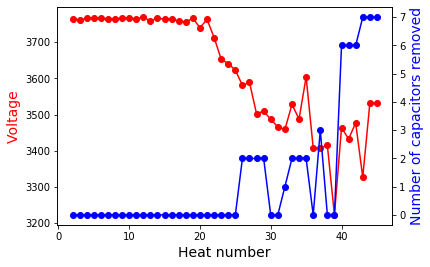

In [14]:
for i in range(1,4):
    fig,ax = plt.subplots()
    ax.plot(Data[Data['campaign']==i]['Heat number (life number)'], Data[Data['campaign']==i]['Voltage'], color="red", marker="o")
    ax.set_xlabel("Heat number",fontsize=14)
    ax.set_ylabel("Voltage",color="red",fontsize=14)
    ax2=ax.twinx()
    ax2.plot(Data[Data['campaign']==i]['Heat number (life number)'], Data[Data['campaign']==i]['Number of capacitors removed'],color="blue",marker="o")
    ax2.set_ylabel("Number of capacitors removed",color="blue",fontsize=14)
    plt.show()


In [15]:
Data_train = Data[Data['campaign']<8.0]
Data_test = Data[Data['campaign']>=8.0]
col = ['campaign','Heat number (life number)']
Data_train = Data[Data['campaign']<8.0]
Data_test = Data[Data['campaign']>=8]
Data_train = Data_train.drop(columns=col,axis=1).reset_index()
Data_train = Data_train.drop(columns='index',axis=1)
Data_test = Data_test.drop(columns=col,axis=1).reset_index()
Data_test = Data_test.drop(columns='index',axis=1)


In [16]:
X_train = Data_train.drop(columns='Voltage',axis=1)
X_test = Data_test.drop(columns='Voltage',axis=1)
y_train = Data_train['Voltage']
y_test = Data_test['Voltage']
X_train = X_train.fillna(0)

In [17]:
y_train

0      3740.0
1      3731.0
2      3764.0
3      3756.0
4      3675.0
        ...  
313    3270.0
314    3357.0
315    3318.0
316    3366.0
317    3424.0
Name: Voltage, Length: 318, dtype: float64

In [18]:
#normalized
#Taking features and target
from sklearn.preprocessing import MinMaxScaler
#Standardizing data
# normalizer1 = preprocessing.MinMaxScaler()
# normalized_X_train = normalizer1.fit_transform(X_train)
# normalized_X_test = normalizer1.transform(X_test)
# normalizer2 = preprocessing.MinMaxScaler()
# normalized_y_train = normalizer2.fit_transform(np.array(y_train).reshape(-1,1))
# normalized_y_test = normalizer2.transform(np.array(y_test).reshape(-1,1))
normalized_X_train = X_train
normalized_y_train = y_train
normalized_X_test = X_test
normalized_y_test = y_test



cols = X_train.columns
#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)
pred_train = y_pred_train
pred_test = y_pred_test
# pred_train = normalizer2.inverse_transform(y_pred_train)
# pred_test = normalizer2.inverse_transform(y_pred_test)
print("Mean squared error on training set is {}".format(mean_squared_error(y_train, pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, pred_test)))

print("R_squared is {}".format(r2_score(y_test, pred_test)))
for i in range(X_train.shape[1]):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))

Mean squared error on training set is 5795.678355602581
Mean squared error on testing set is 5643.292708631155
R_squared is 0.8338919384311905
Previous Voltage weight is : 0.6700398497461373
Previous Frequency weight is : -1.4657666004338554
Refractory lining before heating weight is : 56.079531723271536
Number of capacitors removed weight is : 19.763420602979764


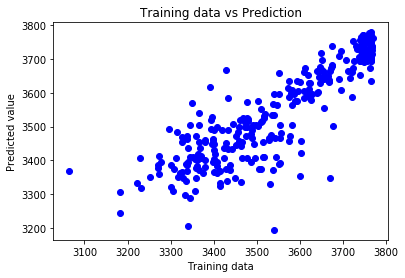

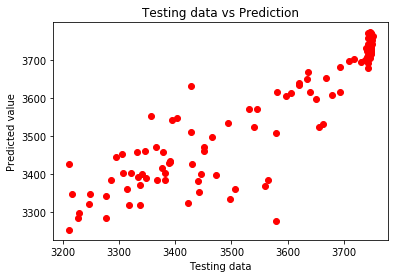

In [19]:
plt.scatter(y_train, pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

In [20]:
error_train = np.sum(np.square(pred_train-np.array(y_train)))
nmse_train = (error_train/np.sum(np.square(np.array(y_train))-np.mean(np.array(y_train))))*100
print('Normalised MSE',nmse_train)
error_test = np.sum(np.square(pred_test-np.array(y_test)))
nmse_test = (error_test/np.sum(np.square(np.array(y_test))-np.mean(np.array(y_test))))*100
print('Normalised MSE',nmse_test)

Normalised MSE 0.045682924142019826
Normalised MSE 0.04425145417406371


In [21]:
print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train-y_train))/np.sum(np.square(y_train-np.mean(y_train)))*100))
print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test-y_test))/np.sum(np.square(y_test-np.mean(y_test)))*100))

Train NMSE score is 21.16276965096352
Test NMSE score is 16.61080615688095
